In [4]:
%matplotlib notebook
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from parabolas import *


In [33]:
import numpy as np
n = 20
x = np.linspace(-n, n)
y = np.linspace(-n, n)
xx, yy = np.meshgrid(x, y)
f = 60.
v1x = v1y = v2 = 0
xTheta = 0. #-np.pi / 2.
yTheta = 0.
#xr, yr, zr = parabolaRot(xx, yy, f, v1x, v1y, v2, xTheta, yTheta)
#xr = 100. * xr
#yr = 100. * yr
#zr = 100. * zr
#xr.shape = yr.shape = zr.shape = (50, 50)
#fn = "data/Baseline_STA10_HIGH_METERS.csv.smoothed.sig.001.all.npz"
fn = "data/BumpScan.csv.smoothed.sig.001.all.npz"
data = np.load(fn)
x = data['x']
y = data['y']
z = data['z']

xx = x.flatten()
yy = y.flatten()
zz = z.flatten()
    
xxn = xx[np.logical_not(np.isnan(xx))];
yyn = yy[np.logical_not(np.isnan(yy))];
zzn = zz[np.logical_not(np.isnan(zz))];

L = np.array([xxn, yyn, zzn])
xr = xxn
yr = yyn
zr = zzn

## This is our canned data


<IPython.core.display.Javascript object>


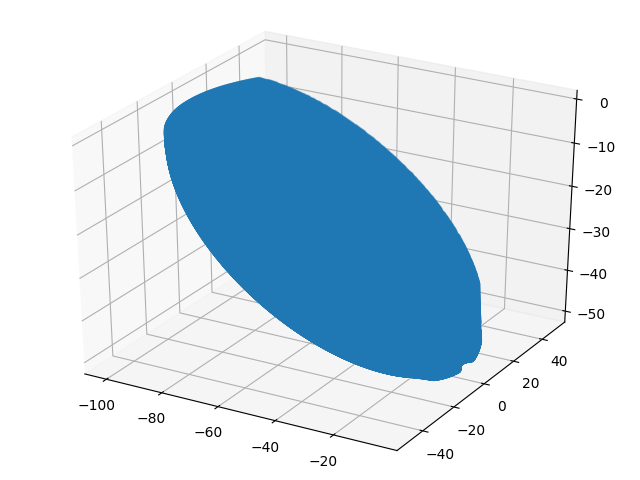

In [34]:
fig = plt.figure()
ax = Axes3D(fig)
#plt.axis('equal')
#plt.axis('tight')
#plt.xlim(np.min(xr), np.max(xr))
#plt.ylim(np.min(yr), np.max(yr))
#plt.autoscale(enable=True)
#ax.set_aspect('equal')
ax.scatter(xxn, yyn, zzn)


In [35]:
guess = [f, v1x, v1y, v2, 0., 0.]
inf = np.inf
pi2 = 2*np.pi
b1 = [-inf, -inf, -inf, -inf, -pi2, -pi2]
b2 = [inf, inf, inf, inf, pi2, pi2]
bounds = (b1, b2)
r = least_squares(fitParabola, guess, args=(xr.flatten(), yr.flatten(), zr.flatten()),
                      #bounds=bounds,
                      method='lm',
                      max_nfev=1000000,
                  
                      ftol=1e-15,
                      xtol=1e-15)

In [36]:
r.x, r.success
r


 active_mask: array([0, 0, 0, 0, 0, 0])
        cost: 7703.339840731453
         fun: array([-0.57786807, -0.5672864 , -0.55433112, ...,  0.8566388 ,
        0.90997089,  0.94311767])
        grad: array([-5.46951390e-05,  9.60957377e-05,  3.41765264e-05,  1.95154861e-04,
        5.04918918e-02,  4.99730656e-03])
         jac: array([[  0.02577662,  -0.06136243,   0.14836197,  -1.        ,
          7.64851182,   3.7952808 ],
       [  0.02615968,  -0.0619607 ,   0.14940064,  -1.        ,
          7.72248595,   3.83710662],
       [  0.02654348,  -0.0625563 ,   0.15043333,  -1.        ,
          7.79649292,   3.87894433],
       ...,
       [  0.09934382,  -0.15646954,  -0.27360757,  -1.        ,
        -21.97527896,  11.00897113],
       [  0.10004717,  -0.15703838,  -0.27456532,  -1.        ,
        -22.07015107,  11.0647554 ],
       [  0.10083116,  -0.15766458,  -0.27563206,  -1.        ,
        -22.16880322,  11.1223455 ]])
     message: '`xtol` termination condition is satis

In [37]:
c = r.x
#newX, newY, newZ = newParabola(xr, yr, zr, c[0], c[1], c[2], c[3], c[4], c[5])
newX, newY, newZ = newParabola(xx, yy, zz, c[0], c[1], c[2], c[3], c[4], c[5])

<IPython.core.display.Javascript object>


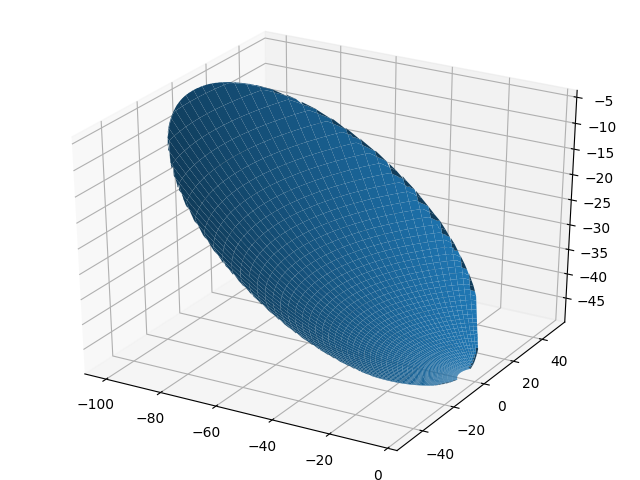

In [38]:
fig = plt.figure()
ax = Axes3D(fig)
newX.shape = newY.shape = newZ.shape = (512, 512)
ax.plot_surface(newX, newY, newZ)


In [18]:
r

 active_mask: array([0, 0, 0, 0, 0, 0])
        cost: 7709.341496035047
         fun: array([-0.57677163, -0.56441054, -0.54756219, ...,  0.87289632,
        0.82898274,  0.8568193 ])
        grad: array([-1.62144873e-04,  3.63192810e-04,  5.22410612e-04,  1.95221961e-06,
        7.96104230e-02, -7.36945220e-03])
         jac: array([[  0.02579018,  -0.0612876 ,   0.14843858,  -1.        ,
          7.64979949,   3.79511047],
       [  0.02617166,  -0.06188371,   0.14947262,  -1.        ,
          7.7237311 ,   3.83690128],
       [  0.02655187,  -0.06247463,   0.15049515,  -1.        ,
          7.79763217,   3.87866188],
       ...,
       [  0.09920476,  -0.15636705,  -0.27341197,  -1.        ,
        -21.97120643,  11.00845279],
       [  0.10028144,  -0.15721105,  -0.27489294,  -1.        ,
        -22.08306719,  11.07221552],
       [  0.101088  ,  -0.15785326,  -0.27598977,  -1.        ,
        -22.18275137,  11.13030683]])
     message: '`xtol` termination condition is satis

## rotate original data via the rotations we fitted for

<IPython.core.display.Javascript object>


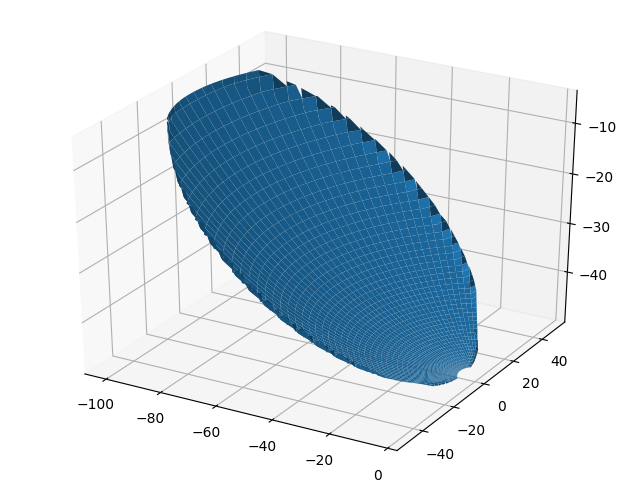

In [39]:
xThetaFit = r.x[4]
yThetaFit = r.x[5]
#xrr, yrr, zrr = rotateData(xr, yr, zr, xThetaFit, yThetaFit)
xrr, yrr, zrr = rotateData(xx, yy, zz, xThetaFit, yThetaFit)
fig = plt.figure()
ax = Axes3D(fig)
xrr.shape = yrr.shape = zrr.shape = (512, 512)
ax.plot_surface(xrr, yrr, zrr)

## plot difference between our final answer and rotated data

<IPython.core.display.Javascript object>


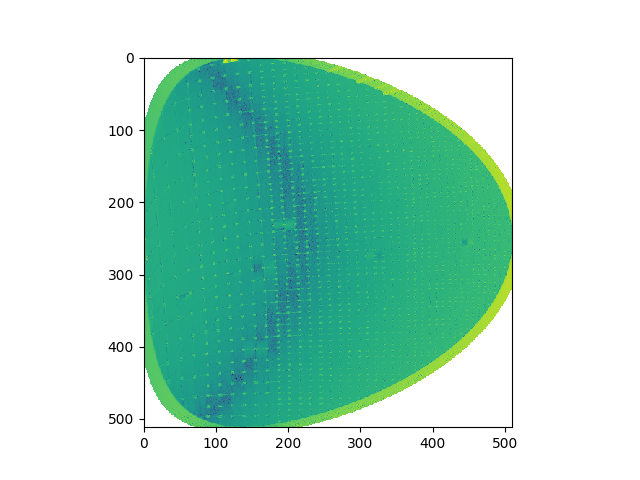

In [40]:
fig = plt.figure()
#ax = Axes3D(fig)
xrr.shape = yrr.shape = zrr.shape = (512, 512)
#ax.plot_surface(xrr, yrr, zrr - newZ)
ax = fig.gca()
ax.imshow(np.log(np.abs(np.diff(zrr - newZ))))

In [41]:
diff = zrr - newZ
np.save("bumpScan", diff);



In [30]:
#diffLoadded = np.load("refScan.npy")

In [32]:
#diffLoadded.shape


(512, 512)